In [ ]:
!curl -L "https://app.roboflow.com/ds/zE6aWUzyKr?key=ssv7TiOV0b" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0    767      0  0:00:01  0:00:01 --:--:--   766
100 2428k  100 2428k    0     0  1278k      0  0:00:01  0:00:01 --:--:-- 1278k
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/c_jpg.rf.8cad08c613a5574eb3a5a6c0154d8717.jpg  
 extracting: test/images/images-19_jpeg_jpg.rf.23a5c543c3180ab5a60a94502d115416.jpg  
 extracting: test/images/images-21_jpeg_jpg.rf.ab5898d024512d4c6cd423e9b6314738.jpg  
 extracting: test/images/images-4_jpeg_jpg.rf.be9adc4403ad18b13270c4419c013c0f.jpg  
 extracting: test/images/m_jpg.rf.ccbbfc90b9c14a29a9d6746ede996b1b.jpg  
   creating: test/labels/
 extracting: test/labels/c_jpg.rf.8cad08c613a5574eb3a5a6c0154d8717.txt  


In [ ]:
#!curl -L "https://app.roboflow.com/ds/KW6wA4IZ8s?key=x13pgjRhSM" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [ ]:
%cd /content/
!git clone https://github.com/ultralytics/yolov5

/content
fatal: destination path 'yolov5' already exists and is not an empty directory.


In [ ]:
!pip install -r yolov5/requirements.txt

In [ ]:
%cat data.yaml

In [ ]:
#클래스 개수를 num_classes에 대입
import yaml
with open("/content/data.yaml", 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

In [ ]:
%cat /content/yolov5/models/yolov5s.yaml

In [ ]:
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [ ]:

%%time
%cd /content/yolov5
!python train.py --img 51 --batch 5 --epochs 100 --data '../data.yaml' --cfg /content/yolov5/models/yolov5s.yaml --weights '' --name yolov5s_results  --cache

In [ ]:
!python detect.py --weights /content/yolov5/runs/train/yolov5s_results2/weights/best.pt --img 51 --conf 0.4 --source ../test/images

In [ ]:
import glob
from IPython.display import Image, display

for imageName in glob.glob('/content/yolov5/runs/detect/exp3/*.jpg'):
    display(Image(filename=imageName))
    print("\n")

In [ ]:
%load_ext tensorboard
%tensorboard --logdir /content/yolov5/runs/

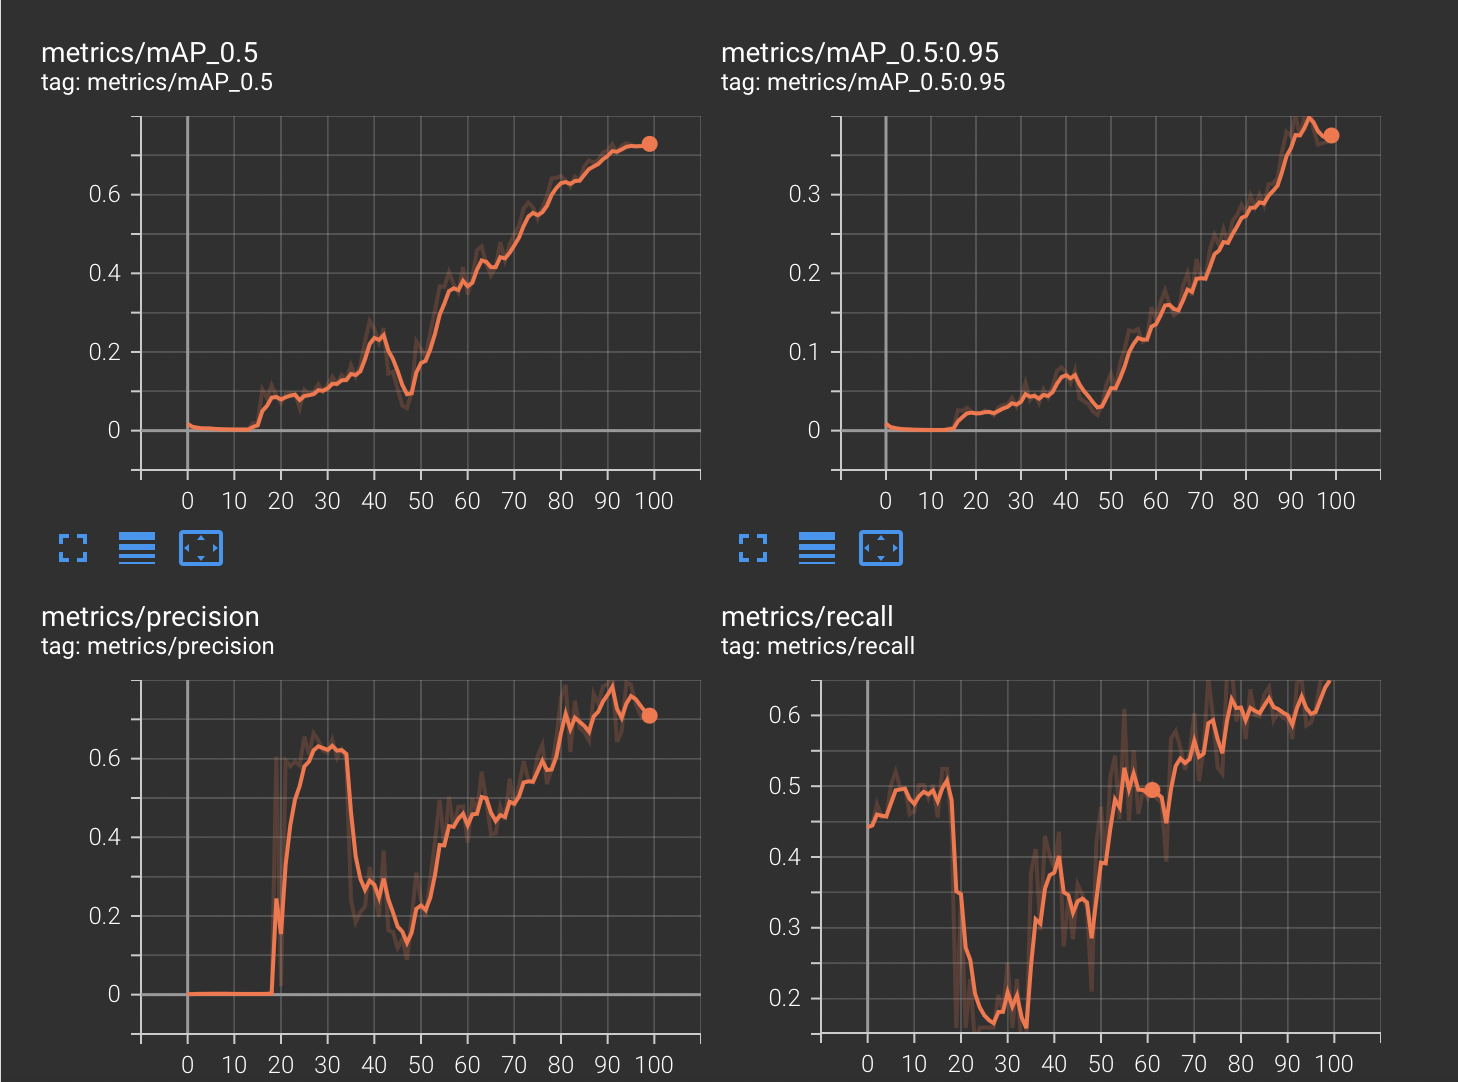

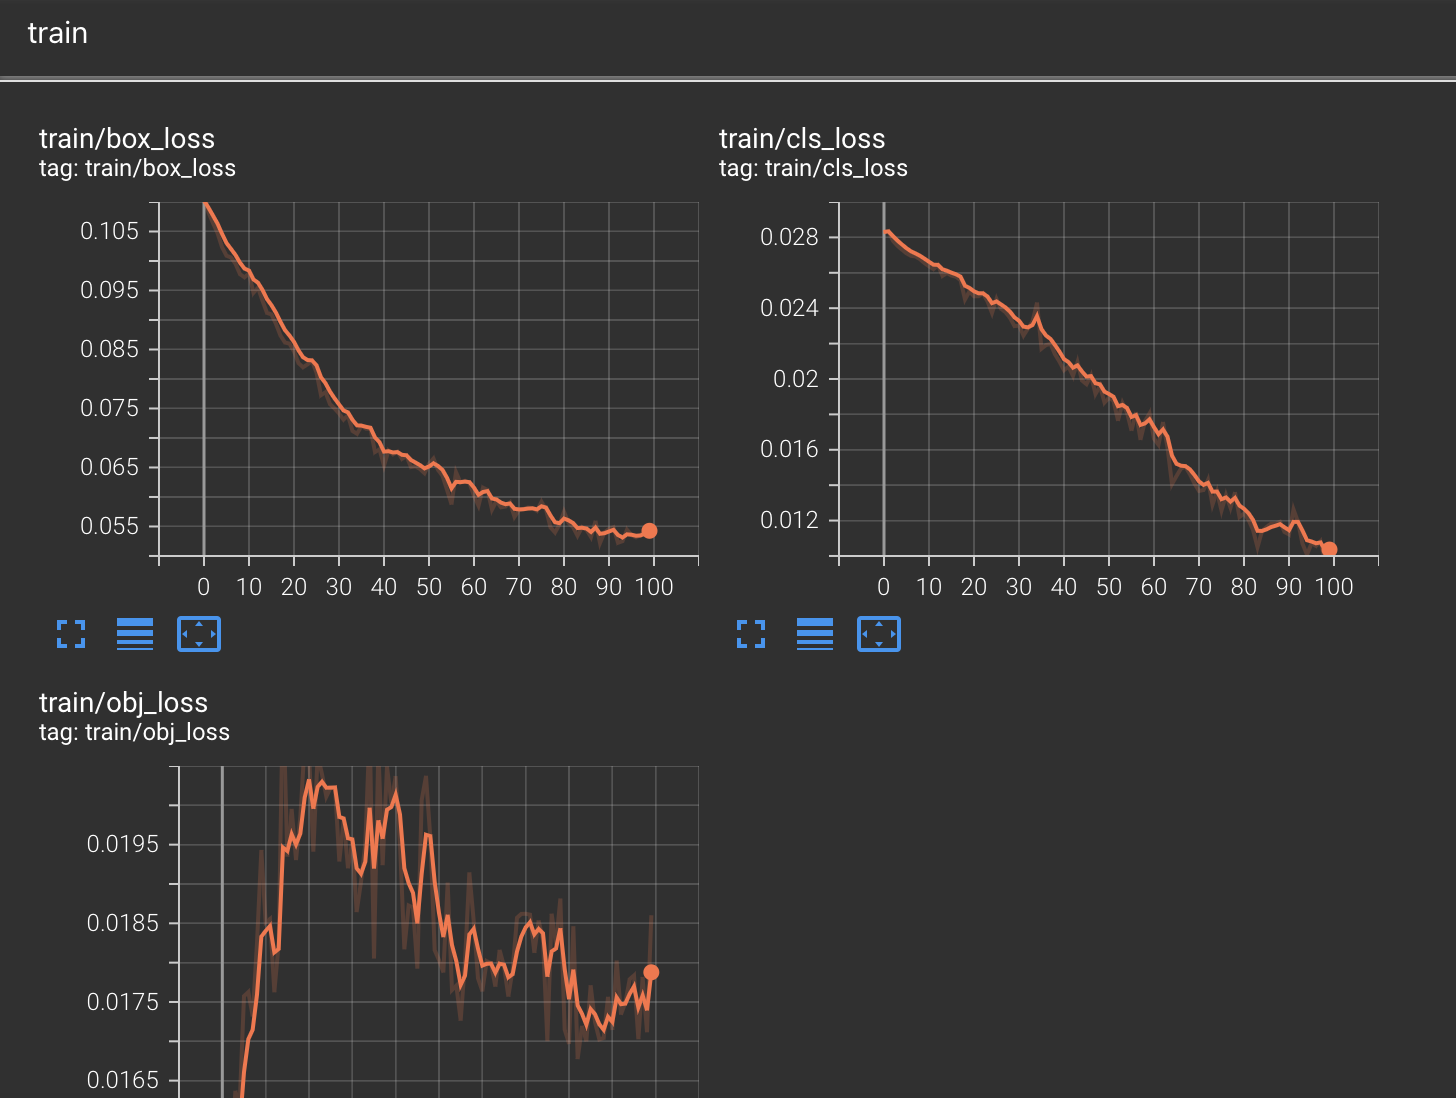